# Markov Chain Monte Carlo

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

## A strange distribution - and a simple proposal

We have learned how to sample values $x_i$ from simple, well-known distributions (Uniform, Normal, Poisson, Binomial, ...)

$$
x_i \propto p(x)
$$

Python/numpy has several convenience functions, and so have many other packages and programming language: R, matlab, ...

But imagine we want to sample from some **arbitrary** probability density function, $p(x) = f(x) /Z$.

We assume that function $f(x)\ge 0$ can be calculated easily, but the normalization factor $Z$ is unknown:

$$Z = \int f(x) dx$$ 



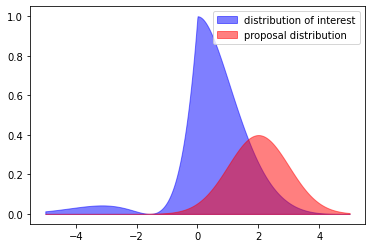

In [5]:
def func(x):
  # invented some function: f(x)>= 0
  y = (1+np.sin(x))*np.exp(-np.abs(x))
  return y

def prop(x, mu=0, sigma=1):
  # define some well-known proposal distribution, e.g. Normal(x|mu, sigma)
  return norm.pdf(x, loc=mu, scale=sigma)

x=np.linspace(-5,5,1000)
plt.fill_between(x, func(x),color='b',alpha=0.5, label='distribution of interest')
plt.fill_between(x, prop(x,mu=2,sigma=1), color='r', alpha=0.5, label='proposal distribution')
plt.legend()
plt.show()

**Sampling Goal:** 

Draw samples $x_i$ from $p(x)$, such that the expectation of any function $A(x)$ can be approximated
$$
E[A(x)] = \sum_x A(x) p(x) \to \sum_i A(x_i) 
$$

There are a range of sampling methods

- Inverse Transform Sampling
- Importance Sampling
- Accept-Reject Sampling
- **Markov Chain Monte Carlo (MCMC)**

## The Metropolis Algorithm

This is the classical MCMC method (1953)

**The idea / The goal:**

Sample a sequence of $x_{t=1, ..., T}$ from a **Markov Chain** with the desired stationary distribution $\pi(x)=f(x)/Z$:
$$
x_t \propto MC
$$




**The Algorithm:**
1. pick a random start $x_{t=0}$
2. propose next $x_p$ from a simpler, feasible distribution, e.g. $N(x|\mu=x_t, \sigma^2)$
3. accept the proposed sample ($x_{t+1}=x_p$) with probability $f(x_p) / f(x_t)$,  otherwise ($x_{t+1}=x_t$)

**Notice:**
- samples $x_t$ are not *iid*, but are correlated by a random walk: $x_t \to x_{t+1}$ 

- a Markov chain with continuous variable
- for illustration: $x_t \in \mathbb{R}$; in practice: $x_t \in \mathbb{R}^n$
- Metropolis, Rosenbluth, Rosenbluth, Teller, Teller (J. Chem Phys, 1953) - 48k citations
 - https://www.osti.gov/servlets/purl/4390578
 - https://cs.gmu.edu/~henryh/483/top-10.html

## Group Task (30 min)

1. Implement the Metropolis algorithm as a function (below) and test it on the function $f(x)$ above.
2. Optional: Invent your own pdf (up to normalization)
3. Explore how the initial value ($x$) and the number of samples ($T$) effect the sampled distribution
4. Discussion: How could you test or change the convergence properties of the Metropolis algorithm?
5. Report your results to the other group

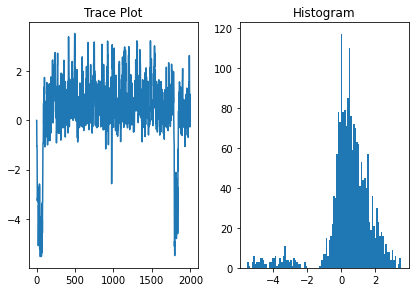

In [ ]:
%%script echo Edit before running cell
def MetropolisSampling(func, x=0, T=1000):
  """ this is a simple implementation of the Metropolis algorithm 
  input:
    - func: a probability density function (not necessarily normalized)
    - x: a starting value for x (default: x=0)
    - T: number of samples (default: T=1000)
  output:
    - list of sampled values x
  """
  sample=[] # initialize empty list of values
  for t in range(T):
     # given "state" x, propose a new state xp 
     # chose normal distribution centered around x
    xp = .... 

     # define the acceptance ratio as a ratio f(xp)/ f(x)
    alpha = ...

    # accept the proposal if alpha is bigger than a random number in (0,1)  
    if (...):
      x = xp

    # add proposed x to sample list
    sample.append(x)

  return sample

sample = MetropolisSampling(func, x=0, T=2000)

# plot samples ("traces") and histogram 
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
ax[0].plot(sample)
ax[0].set_title('Trace Plot')
ax[1].hist(sample,100)
ax[1].set_title('Histogram')
plt.show()

## Why does it work?

**Claim**: We constructed an ergodic Markov chain $X_t \to  X_{t+1}$

**Question**: What are the transition probabilities $P(X_{t+1}=b | X_t=a)$?

Write $P$ as product of a **proposal probability** $N$ and an **acceptance probability** $A$
$$
Pr(X_{t+1}=b | X_t=a) = A(X_{t+1}=b|X_t=a, X_p=b) ~ N(X_p=b|\mu=a, \sigma^2)
$$

$$
Pr(b | a) = A(b|a, b) ~N(b|a, \sigma^2) \\
Pr(b | a) = \min\left(1, \frac{f(b)}{f(a)}\right) ~ N(b|a, \sigma^2) = \min\left(1, \frac{\pi(b)}{\pi(a)}\right) ~ N(b|a, \sigma^2)
$$

**Detailed balance:** $Pr(a\to b) = Pr(b\to a)$

$$
\begin{align}
\pi(a)~P(b|a)  &= \pi(a)~ \min\left(1, \frac{\pi(b)}{\pi(a)}\right) ~ N(b|a, \sigma^2) 
           = \min\left(\pi(a), \pi(b)\right) ~ N(b|a, \sigma^2)\\
           &= \pi(b) ~ P(a|b)
\end{align}
$$

Symmetries:

- $N(a|b) = N(b|a)$
- $\min(\pi(a), \pi(b)) = \min(\pi(b),\pi(a))$


Notice:
- other requirements: $P$ irreducible & aperiodic.
- Detailed balance also holds for other symmetric proposal distributions: $Q(a|b)=Q(b|a)$
- unknown normalization $Z$ cancels in the acceptance rate.


## Issues

- "thermalization": it will take some time before Markov Chain samples the desired stationary distribution
- chain onvergence: 
  - theoretically considerations (rapid mixing), and
  - practical approaches (run multiple chains)
- autocorrelation: try to make large steps (e.g. $\sigma^2$ large)
- curse of dimensionality: small steps (move rapidly away from high probability regions in $D$ dimensions)

## Many Developments

- asymmetric proposal distributions: Metropolis-Hastings
- Gibbs sampler: less random sampling
- Hamiltonian Monte Carlo: model dynamics in parameter space (introduce momentum)
- Tools: Stan, pyStan, pymc (3/4)

## Tools: Pymc / Arviz

- Pymc provides the above functionality (and much more).

- Arviz adds statistical analysis and diagnostics.

In [ ]:
%%script echo Install only once (if necessary)
pip install pymc arviz

Install only once (if necessary)


In [2]:
import pymc as pm
import arviz as az

print(pm.__version__)

4.1.4


**Notice:** Make sure to use version 4 or higher. There are differences with pymc3, which uses different data formats and defaults.

## Metropolis Sampling

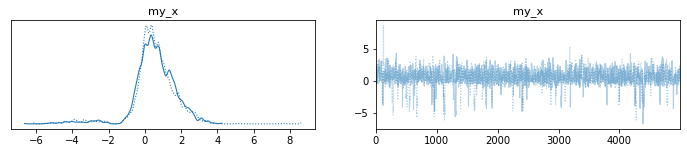

In [6]:
T=5000 # number of time steps (samples)
nc=2   # number of chains

# first define log(p) of the function (p>0) to sample from
def log_func(x):
  return np.log(func(x))

# with context manager
with pm.Model():
  pm.DensityDist('my_x', logp=log_func)     # define custom distribution
  trace = pm.sample(T, chains=nc, step=pm.Metropolis())

pt=pm.plot_trace(trace)

### Autocorrelation

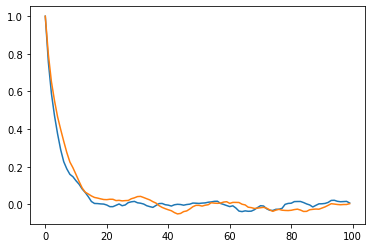

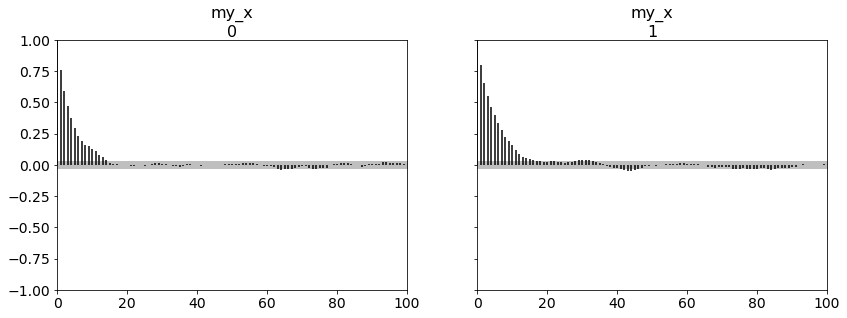

In [7]:
# access autocorrelation
ac=pm.autocorr(np.array(trace.posterior.my_x))
plt.plot(ac[0,:100]) # chain=0
plt.plot(ac[1,:100]) # chain=1
plt.show()

# plot autocorrelation (for each chain)
ap=pm.plot_autocorr(trace)

## References

- MCMC Theory (from pymc perspective): https://pymcmc.readthedocs.io/en/latest/theory.html
- Metropolis-Hastings: https://stephens999.github.io/fiveMinuteStats/MH_intro.html
